In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
genotypes = ["SynPCB-703","iRFP-DMSO","SynPCB-iRFP","SynPCB-670","iRFP-BV","iRFP-PCB","703-DMSO","703-PCB","703-BV","670-PCB","670-DMSO","670-BV"]
orders = [8,9,12,4,10,11,5,7,6,3,1,2]
flist = glob.glob("quantification/*.csv")
df = pd.DataFrame()
for file, genotype, order in zip(flist, genotypes, orders):
    file_tmp = pd.read_csv(file,index_col=0)
    file_tmp["sample"] = file[15:-4]
    file_tmp["genotype"] = genotype
    file_tmp["order"] = order
    df = pd.concat([df,file_tmp])
df = df.reset_index(drop = True)
df2 = df.sort_values('order')
df2

Mean           sample     genotype  order
511    40.258  miRFP670-DMSO-1     670-DMSO      1
526    36.155  miRFP670-DMSO-1     670-DMSO      1
527    37.144  miRFP670-DMSO-1     670-DMSO      1
528    44.186  miRFP670-DMSO-1     670-DMSO      1
529    41.278  miRFP670-DMSO-1     670-DMSO      1
..        ...              ...          ...    ...
129  3797.216         YG1009-1  SynPCB-iRFP     12
128  3700.072         YG1009-1  SynPCB-iRFP     12
127  4195.423         YG1009-1  SynPCB-iRFP     12
100  4817.959         YG1009-1  SynPCB-iRFP     12
123  4254.237         YG1009-1  SynPCB-iRFP     12

[600 rows x 4 columns]

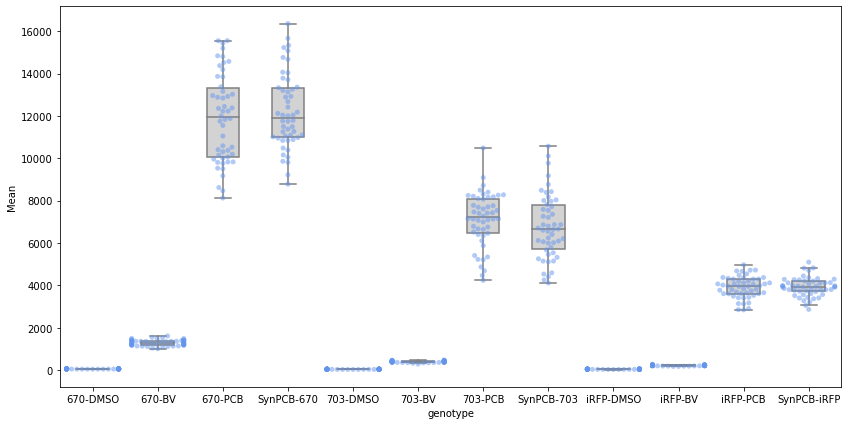

In [3]:
plt.figure(figsize=(14,7))
plt.rcParams['pdf.fonttype'] = 42
sns.boxplot(data=df2, x='genotype', y='Mean', color ='lightgrey',fliersize=0 , width=0.5)
sns.swarmplot(x="genotype", y="Mean", data=df2, color="cornflowerblue", size=5, alpha =0.5)
#plt.savefig("20210717-miRFP-PCB-1.pdf")